# Heatmap calculations and statistics

In [5]:
! pip install statsbomb

In [1]:
import statsbomb as statsb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sb

In [146]:
matches = statsb.Matches(event_id='2', season_id='44')
df = matches.get_dataframe()
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,referee
0,3749257,2004-05-15,16:00:00.000,2,44,1,22,2,1,available,unscheduled,2020-08-30T08:12:14.579037,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
1,3749246,2004-03-28,17:05:00.000,2,44,1,39,1,1,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",30,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
2,3749153,2004-01-10,16:00:00.000,2,44,1,47,4,1,available,unscheduled,2020-08-30T08:12:14.579037,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
3,3749642,2004-02-28,16:00:00.000,2,44,1,75,2,1,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",27,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
4,3749358,2003-08-24,17:05:00.000,2,44,47,1,0,4,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",2,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
5,3749346,2003-11-01,16:00:00.000,2,44,101,1,1,4,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",11,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
6,3749253,2003-10-04,13:30:00.000,2,44,24,1,1,2,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",8,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
7,3749079,2003-10-18,16:00:00.000,2,44,1,33,2,1,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",9,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
8,3749465,2004-03-13,16:00:00.000,2,44,98,1,0,2,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"
9,3749133,2004-01-18,15:00:00.000,2,44,59,1,0,2,available,unscheduled,2020-07-29T05:00,None,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 1279, 'name': 'None'}"


In [170]:
events = statsb.Events(event_id='3749246')
df = events.get_dataframe(event_type='pass')
df_arsenal = df[df['possession_team'].isin(['Arsenal'])]

In [171]:
df_arsenal.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,through_ball,cross,cut_back,switch,shot_assist,goal_assist,start_location_x,start_location_y,end_location_x,end_location_y
0,pass,58c0143b-5ffc-4c94-94a5-4295f8398afe,5,1,00:00:01.834,0,1,2,Arsenal,From Kick Off,...,None,None,None,None,None,None,60.0,40.0,59.2,38.4
1,pass,5000dc60-5a82-4420-9932-ac70bf135228,8,1,00:00:03.645,0,3,2,Arsenal,From Kick Off,...,None,None,None,None,None,None,57.8,40.7,38.9,63.1
2,pass,2a7afafb-3bdc-4bce-8cf7-03e736154ff0,11,1,00:00:06.991,0,6,2,Arsenal,From Kick Off,...,None,None,None,None,None,None,38.3,60.5,31.4,27.1
3,pass,3813da72-bc84-4e0b-80cd-657ddba414ef,14,1,00:00:10.570,0,10,2,Arsenal,From Kick Off,...,None,None,None,None,None,None,31.0,25.9,36.9,4.3
4,pass,04ec28c7-6052-43c1-ba42-7052dd8f4810,17,1,00:00:12.652,0,12,2,Arsenal,From Kick Off,...,None,None,None,None,None,None,34.5,4.7,27.9,20.1


/Users/frankhopkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


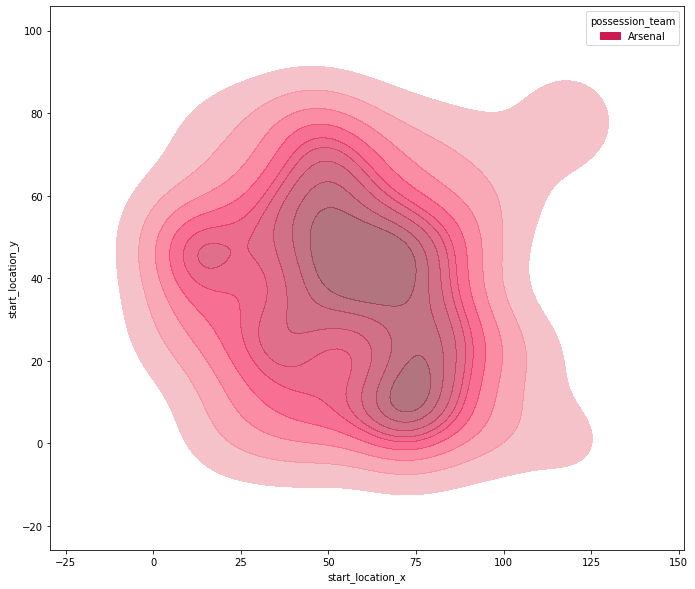

In [172]:
fig, ax = plt.subplots()

fig.set_size_inches(25,10)

#Plot one - include shade
plt.subplot(121)
sb.kdeplot(
    data=df_arsenal, x="start_location_x", y="start_location_y", hue="possession_team", fill = True, alpha=0.7, linewidth=5, palette = "rocket")

plt.show()

plt.show()

/Users/frankhopkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


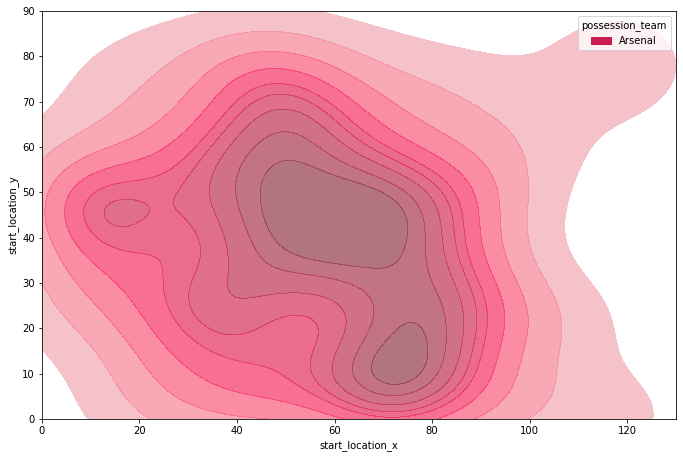

In [173]:
fig, ax = plt.subplots()

fig.set_size_inches(25,7.5)

#Plot one - include shade
plt.subplot(121)
sb.kdeplot(
    data=df_arsenal, x="start_location_x", y="start_location_y", hue="possession_team", fill = True, alpha=0.7, linewidth=5, palette = "rocket")

plt.ylim(0, 90)
plt.xlim(0, 130)

plt.show()

/Users/frankhopkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


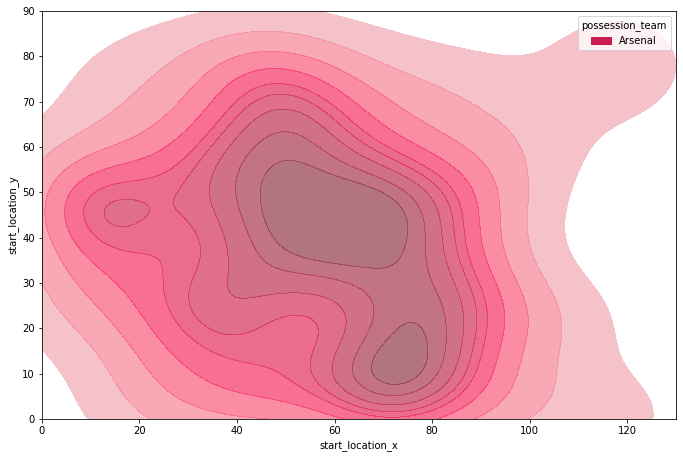

In [174]:
fig, ax = plt.subplots()

fig.set_size_inches(25,7.5)

#Plot one - include shade
plt.subplot(121)
sb.kdeplot(
    data=df_arsenal, x="start_location_x", y="start_location_y", hue="possession_team", fill = True, alpha=0.7, linewidth=5, palette = "rocket")

plt.ylim(0, 90)
plt.xlim(0, 130)

plt.show()

/Users/frankhopkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


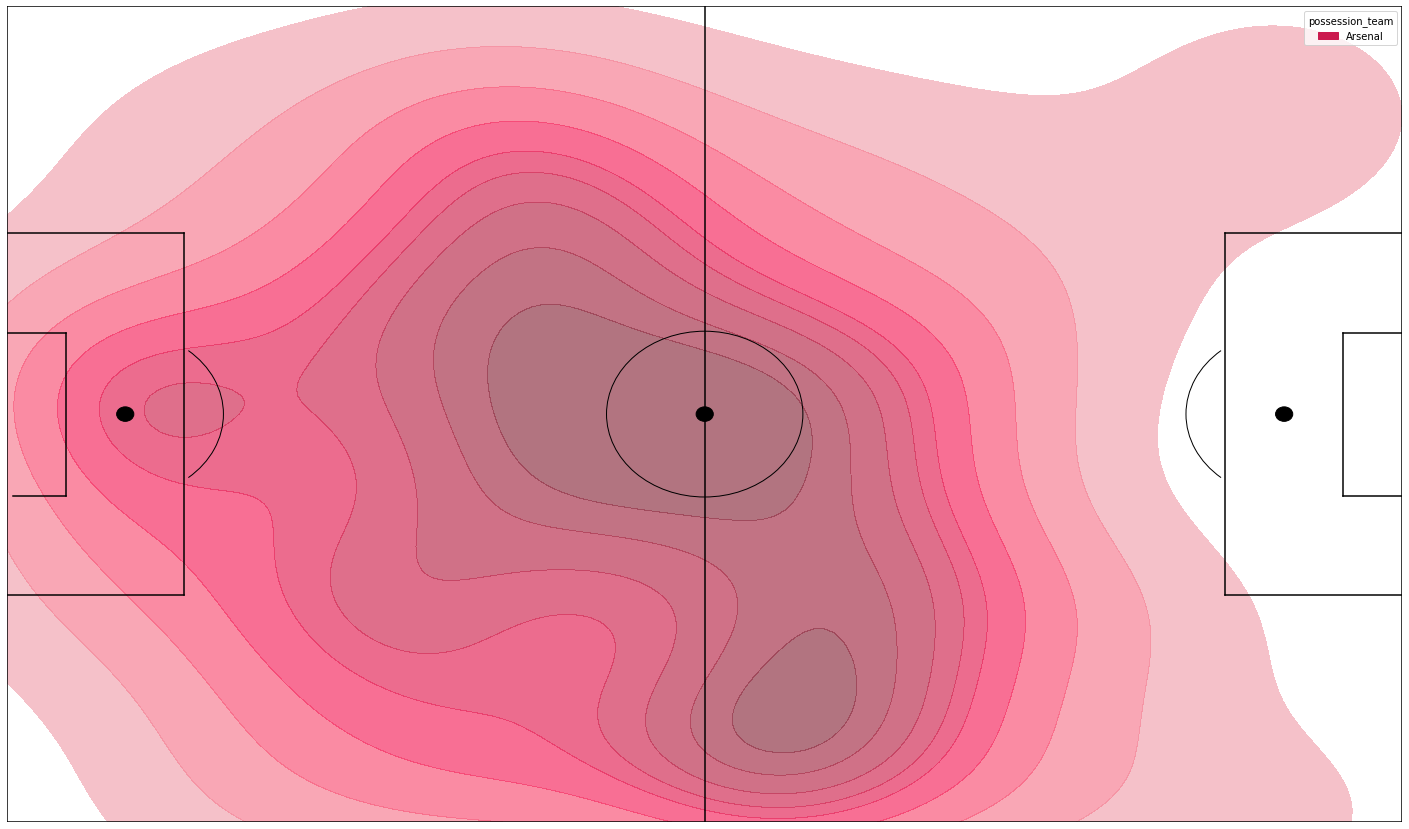

In [175]:
#Create figure
fig=plt.figure()
fig.set_size_inches(25,15)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sb.kdeplot(
    data=df_arsenal, x="start_location_x", y="start_location_y", hue="possession_team", fill = True, alpha=0.7, linewidth=5, palette = "rocket")
plt.ylim(0, 90)
plt.xlim(0, 130)

#Display Pitch
plt.show()
